<a href="https://colab.research.google.com/github/MaazMahboob/GNCIPL-AI-ML-/blob/main/AIML_week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIML Week-3 Project

# Project Name: Bank Customer Churn Prediction


### Project Type: Comprehensive EDA with Preprocessing and Classification Models

### Dataset Link : (https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset)

### Project prepared by : Maaz Mahboob




## **Problem Statement**: This project aims to analyze customer churn for ABC Multistate Bank. The goal is to clean and prepare the dataset, explore customer demographics and financial behavior, identify patterns linked to churn, and build models that can predict whether a customer is likely to leave the bank.

#Coding Section

### Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, precision_score, recall_score,f1_score)

from scipy.stats import chi2_contingency, ttest_ind


### STEP 1: DATASET LOADING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print("\n STEP 1: DATASET LOADING")
print("-"*80)


df = pd.read_csv('/content/drive/MyDrive/Bank Customer Churn Prediction.csv')

df_clean = df.copy()

print("Dataset loaded successfully!")



 STEP 1: DATASET LOADING
--------------------------------------------------------------------------------
Dataset loaded successfully!


###STEP 2: DATASET FIRST LOOK

In [ ]:
print("\nSTEP 2: DATASET FIRST LOOK")
print("-"*80)

print("\nFirst 7 Rows of the Dataset:\n")
df_clean.head(7)


STEP 2: DATASET FIRST LOOK
--------------------------------------------------------------------------------

First 7 Rows of the Dataset:



,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0


### STEP 3: DATASET ROWS & COLUMNS COUNT

In [ ]:
print("\n STEP 3: DATASET DIMENSIONS")
print("-"*80)

num_rows, num_columns = df_clean.shape

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')


 STEP 3: DATASET DIMENSIONS
--------------------------------------------------------------------------------
Number of rows: 10000
Number of columns: 12


### STEP 4: DATASET INFORMATION

In [ ]:
print("\n STEP 4: DATASET INFORMATION")
print("-"*80)

print("\nDataset Info:")
df_clean.info()


 STEP 4: DATASET INFORMATION
--------------------------------------------------------------------------------

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### STEP 5: UNDERSTANDING YOUR VARIABLES

In [ ]:
print("\n STEP 5: UNDERSTANDING YOUR VARIABLES")
print("-"*80)

print("\nColumns Present in the Dataset:\n")
print(df_clean.columns.tolist())

print("\n\nData types of the columns:\n")
print(df_clean.dtypes)


 STEP 5: UNDERSTANDING YOUR VARIABLES
--------------------------------------------------------------------------------

Columns Present in the Dataset:

['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']


Data types of the columns:

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object


### STEP 6: DATASET DESCRIPTION

In [ ]:
print("\n STEP 6: DATASET DESCRIPTION")
print("-"*80)

print("\nDescription of the Dataset:")
df_clean.describe()


 STEP 6: DATASET DESCRIPTION
--------------------------------------------------------------------------------

Description of the Dataset:


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
print("\n\n Target Variable Analysis - 'churn':")
churn_counts = df['churn'].value_counts()
print(churn_counts)
churn_rate = df['churn'].mean() * 100
print(f"\n Churn Rate: {churn_rate:.2f}%")
print(f"   - Customers who left: {churn_counts[1]:,} ({(churn_counts[1]/len(df)*100):.1f}%)")
print(f"   - Customers who stayed: {churn_counts[0]:,} ({(churn_counts[0]/len(df)*100):.1f}%)")




 Target Variable Analysis - 'churn':
churn
0    7963
1    2037
Name: count, dtype: int64

 Churn Rate: 20.37%
   - Customers who left: 2,037 (20.4%)
   - Customers who stayed: 7,963 (79.6%)


### STEP 7: CHECK UNIQUE VALUES

In [ ]:
print("\n STEP 7: UNIQUE VALUES CHECK")
print("-"*80)

print("\nUnique Values in each Column:")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col:20s}: {unique_count:5d} ")


 STEP 7: UNIQUE VALUES CHECK
--------------------------------------------------------------------------------

Unique Values in each Column:
customer_id         : 10000 
credit_score        :   460 
country             :     3 
gender              :     2 
age                 :    70 
tenure              :    11 
balance             :  6382 
products_number     :     4 
credit_card         :     2 
active_member       :     2 
estimated_salary    :  9999 
churn               :     2 


### STEP 8: VARIABLES DESCRIPTION

In [ ]:
print("\n STEP 8: VARIABLES DESCRIPTION")
print("-"*80)

print("""
VARIABLE DESCRIPTIONS:
======================

CUSTOMER IDENTIFICATION:
------------------------
1. customer_id
   • Unique identifier assigned to each customer.
   • Used only for record tracking; not included in model training.

DEMOGRAPHIC INFORMATION:
------------------------
2. country
   • Country of residence of the customer.
   • Categories:
       - France
       - Germany
       - Spain
   • Used to analyze geographic differences in churn behavior.

3. gender
   • Gender of the customer.
   • Categories:
       - Male
       - Female
   • Helps identify demographic patterns in churn.

4. age
   • Age of the customer in years.
   • Older customers tend to show different churn trends compared to younger customers.

BANKING RELATIONSHIP FEATURES:
------------------------------
5. credit_score
   • Numerical value indicating customer's creditworthiness.
   • Higher score = better history of repayments.
   • Typical range: 300–850

6. tenure
   • Number of years the customer has been associated with the bank.
   • Range: 0–10 years.
   • Measures customer loyalty and relationship strength.

7. balance
   • Customer’s account balance (in USD).
   • Higher or zero balance values often correlate with churn behavior.

8. products_number
   • Number of banking products the customer uses.
   • Examples of bank products:
       - Credit card
       - Loan
       - Savings account
       - Investment account
   • Range: 1 to 4.
   • Indicates engagement level with the bank.

9. credit_card
   • Whether the customer holds a credit card with the bank.
   • 1 = Yes
     0 = No

10. active_member
    • Whether the customer is considered an active bank user.
    • 1 = Active
      0 = Inactive
    • Active customers generally show lower churn.

FINANCIAL INDICATOR:
---------------------
11. estimated_salary
    • Estimated annual salary of the customer.
    • Helps assess financial background and spending potential.

TARGET VARIABLE:
----------------
12. churn
    • Indicates whether the customer has left the bank.
    • Values:
        0 = Customer Stayed
        1 = Customer Left (Churned)
""")



 STEP 8: VARIABLES DESCRIPTION
--------------------------------------------------------------------------------

VARIABLE DESCRIPTIONS:

CUSTOMER IDENTIFICATION:
------------------------
1. customer_id
   • Unique identifier assigned to each customer.
   • Used only for record tracking; not included in model training.

DEMOGRAPHIC INFORMATION:
------------------------
2. country
   • Country of residence of the customer.
   • Categories:
       - France
       - Germany
       - Spain
   • Used to analyze geographic differences in churn behavior.

3. gender
   • Gender of the customer.
   • Categories:
       - Male
       - Female
   • Helps identify demographic patterns in churn.

4. age
   • Age of the customer in years.
   • Older customers tend to show different churn trends compared to younger customers.

BANKING RELATIONSHIP FEATURES:
------------------------------
5. credit_score
   • Numerical value indicating customer's creditworthiness.
   • Higher score = better history of

#  DATA WRANGLING

###STEP 9: MISSING VALUES COUNT

In [ ]:
print("\n STEP 9: MISSING VALUES COUNT")
print("-"*80)

print("\nMissing values count:\n")
missing_counts = df_clean.isnull().sum()
print(missing_counts)

print(f"\nTotal missing values: {missing_counts.sum()}")


 STEP 9: MISSING VALUES COUNT
--------------------------------------------------------------------------------

Missing values count:

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Total missing values: 0


### VISUALIZING MISSING VALUES

In [ ]:
print("\n VISUALIZING MISSING VALUES")
print("-"*80)

missing_data = df_clean.isnull().sum()

fig = px.bar(
    x=missing_data.index,
    y=missing_data.values,
    labels={'x': 'Columns', 'y': 'Missing Count'},
    title='Missing Values Count by Column',
    color=missing_data.values,
    color_continuous_scale='Reds'
)
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_layout(height=500, width=800)
fig.show()

total_missing = missing_data.sum()
if total_missing == 0:
    print("✓ No missing values found in the dataset! ✅")
else:
    print(f"⚠ Found {total_missing} missing values in the dataset.")




 VISUALIZING MISSING VALUES
--------------------------------------------------------------------------------


✓ No missing values found in the dataset! ✅


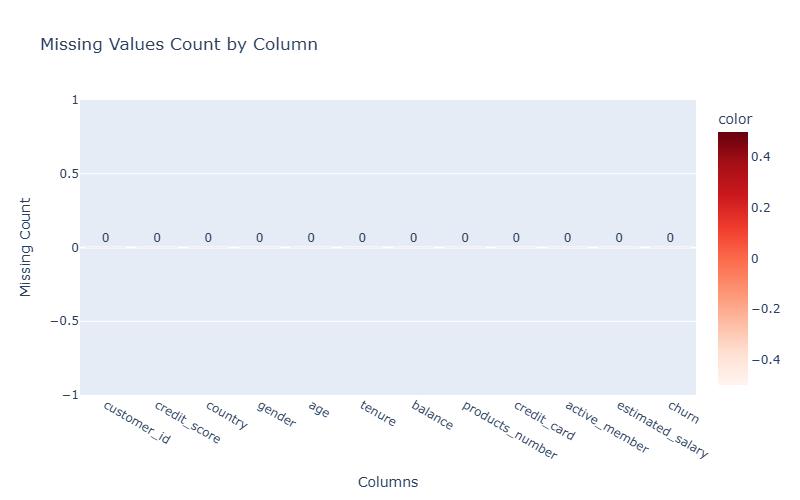

### STEP 10: HANDLE MISSING VALUES

In [ ]:
print("\n1. HANDLE MISSING VALUES")
print("-" * 40)

total_missing = df_clean.isnull().sum().sum()
print(f"Total missing values before handling: {total_missing}\n")

# Numerical columns - fill missing values with median
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
for col in numerical_cols:
    if df_clean[col].isnull().sum() > 0:
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)
        print(f"   ✓ Filled '{col}' missing values with median ({median_val:.2f})")

# Categorical columns - fill missing values with mode
categorical_cols = df_clean.select_dtypes(exclude=[np.number]).columns.tolist()
for col in categorical_cols:
    if df_clean[col].isnull().sum() > 0:
        mode_val = df_clean[col].mode()[0]
        df_clean[col].fillna(mode_val, inplace=True)
        print(f"   ✓ Filled '{col}' missing values with mode ({mode_val})")


remaining_missing = df_clean.isnull().sum().sum()
print(f"\n✓ All missing values handled. Remaining: {remaining_missing}")



1. HANDLE MISSING VALUES
----------------------------------------
Total missing values before handling: 0


✓ All missing values handled. Remaining: 0


### STEP 11: Handle Duplicate Rows

In [ ]:
print("\n2. REMOVE EXACT DUPLICATES")
print("-"*40)

print(f"Checking for duplicate rows...")
print(f"Duplicates found: {df_clean.duplicated().sum()}")

df_clean = df_clean.drop_duplicates()
print(f"Shape after removing duplicates: {df_clean.shape}")


2. REMOVE EXACT DUPLICATES
----------------------------------------
Checking for duplicate rows...
Duplicates found: 0
Shape after removing duplicates: (10000, 12)


### STEP 12: FIX INCONSISTENT ENTRIES

In [ ]:
print("\n\n STEP 3: INCONSISTENT DATA HANDLING")
print("="*80)

# Check for any inconsistencies
print("\nChecking for inconsistencies in categorical variables:")

# Country
print(f"\nCountry values: {df['country'].unique()}")

# Gender
print(f"Gender values: {df['gender'].unique()}")

# Binary variables
print(f"Credit Card values: {df['credit_card'].unique()}")
print(f"Active Member values: {df['active_member'].unique()}")
print(f"Churn values: {df['churn'].unique()}")

print("\n✅ No inconsistencies found in the data!")



 STEP 3: INCONSISTENT DATA HANDLING

Checking for inconsistencies in categorical variables:

Country values: ['France' 'Spain' 'Germany']
Gender values: ['Female' 'Male']
Credit Card values: [1 0]
Active Member values: [1 0]
Churn values: [1 0]

✅ No inconsistencies found in the data!


### STEP 13: DETECT & TREAT OUTLIERS

In [ ]:
print("\n" + "-"*80)
print("4. OUTLIER DETECTION & HANDLING (IQR Method)")
print("-"*80)

# Key numerical features for outlier detection
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("\nOutlier Detection Summary:")
for col in numerical_features:
    if col in df_clean.columns:
        count, lower, upper = detect_outliers_iqr(df_clean, col)
        percentage = (count / len(df_clean)) * 100
        print(f"   {col:15s}: {count:4d} outliers "
              f"({percentage:.2f}%) (Bounds: {lower:.2f} - {upper:.2f})")


# Cap outliers using IQR method
print("\n Treating outliers by capping...")
for col in numerical_features:
    if col in df_clean.columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)

print(f"✓ Outliers capped for {len(numerical_features)} numerical features")


--------------------------------------------------------------------------------
4. OUTLIER DETECTION & HANDLING (IQR Method)
--------------------------------------------------------------------------------

Outlier Detection Summary:
   credit_score   :   15 outliers (0.15%) (Bounds: 383.00 - 919.00)
   age            :  359 outliers (3.59%) (Bounds: 14.00 - 62.00)
   tenure         :    0 outliers (0.00%) (Bounds: -3.00 - 13.00)
   balance        :    0 outliers (0.00%) (Bounds: -191466.36 - 319110.60)
   estimated_salary:    0 outliers (0.00%) (Bounds: -96577.10 - 296967.45)

 Treating outliers by capping...
✓ Outliers capped for 5 numerical features


### STEP 15: FEATURE ENGINEERING

In [ ]:
# 1. Age Groups
df_clean['age_group'] = pd.cut(df_clean['age'],
                               bins=[0, 30, 40, 50, 100],
                               labels=['Young ', 'Middle ',
                                       'Senior ', 'Elderly '])

# 2. Balance Categories
df_clean['balance_category'] = pd.cut(df_clean['balance'],
                                      bins=[-1, 0.01, 100000, 200000, 300000],
                                      labels=['Zero Balance', 'Low ',
                                              'Medium ', 'High '])

# 3. Credit Score Categories
df_clean['credit_score_category'] = pd.cut(df_clean['credit_score'],
                                           bins=[0, 580, 670, 740, 900],
                                           labels=['Poor', 'Fair', 'Good', 'Excellent'])

# 4. Tenure Groups
df_clean['tenure_group'] = pd.cut(df_clean['tenure'],
                                  bins=[-1, 3, 6, 11],
                                  labels=['Short ', 'Medium',
                                          'Long'])

print("\n✅ Created New Features:")
print("   1. age_group - Age categorization")
print("   2. balance_category - Balance ranges")
print("   3. credit_score_category - Credit score quality")
print("   4. tenure_group - Tenure duration")

print(f"\n📊 Updated Dataset Shape: {df_clean.shape}")

print("\n📊 New Feature Distributions:")

# 1. Age Groups
print("\nAge Groups:")
print(df_clean['age_group'].value_counts().sort_index())

# 2. Balance Categories
print("\nBalance Categories:")
print(df_clean['balance_category'].value_counts().sort_index())

# 3. Credit Score Categories
print("\nCredit Score Categories:")
print(df_clean['credit_score_category'].value_counts().sort_index())

# 4. Tenure Groups
print("\nTenure Groups:")
print(df_clean['tenure_group'].value_counts().sort_index())



✅ Created New Features:
   1. age_group - Age categorization
   2. balance_category - Balance ranges
   3. credit_score_category - Credit score quality
   4. tenure_group - Tenure duration

📊 Updated Dataset Shape: (10000, 16)

📊 New Feature Distributions:

Age Groups:
age_group
Young       1968
Middle      4451
Senior      2320
Elderly     1261
Name: count, dtype: int64

Balance Categories:
balance_category
Zero Balance    3617
Low             1584
Medium          4765
High              34
Name: count, dtype: int64

Credit Score Categories:
credit_score_category
Poor         2393
Fair         3350
Good         2397
Excellent    1860
Name: count, dtype: int64

Tenure Groups:
tenure_group
Short     3505
Medium    2968
Long      3527
Name: count, dtype: int64


### EDA PART 1: UNIVARIATE ANALYSIS

In [ ]:
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=(
        "<b>Age Distribution of Bank Customers</b>",
        "<b>Age Boxplot</b>"
    ),
    column_widths=[0.65, 0.35],
    horizontal_spacing=0.12
)

# --- Histogram (Left) ---
fig.add_trace(
    go.Histogram(
        x=df_clean['age'],
        nbinsx=30,
        marker_color='#3498db',
        opacity=0.9
    ),
    row=1, col=1
)

# Add mean line on histogram
fig.add_vline(
    x=df_clean['age'].mean(),
    line_dash="dash",
    line_color="red",
    annotation_text=f"Mean: {df_clean['age'].mean():.1f}",
    row=1, col=1
)

# --- Boxplot (Right) ---
fig.add_trace(
    go.Box(
        y=df_clean['age'],
        marker_color='#3498db',
        boxmean=True,
        opacity=0.85
    ),
    row=1, col=2
)

fig.update_layout(
    title_text="<b>Age Analysis (Histogram + Boxplot)</b>",
    template="plotly_white",
    height=500,
    width=1400,
    showlegend=False,
    margin=dict(l=40, r=40, t=80, b=40)
)

fig.update_xaxes(title="Age (years)", row=1, col=1)
fig.update_yaxes(title="Frequency", row=1, col=1)
fig.update_yaxes(title="Age (years)", row=1, col=2)

fig.show()


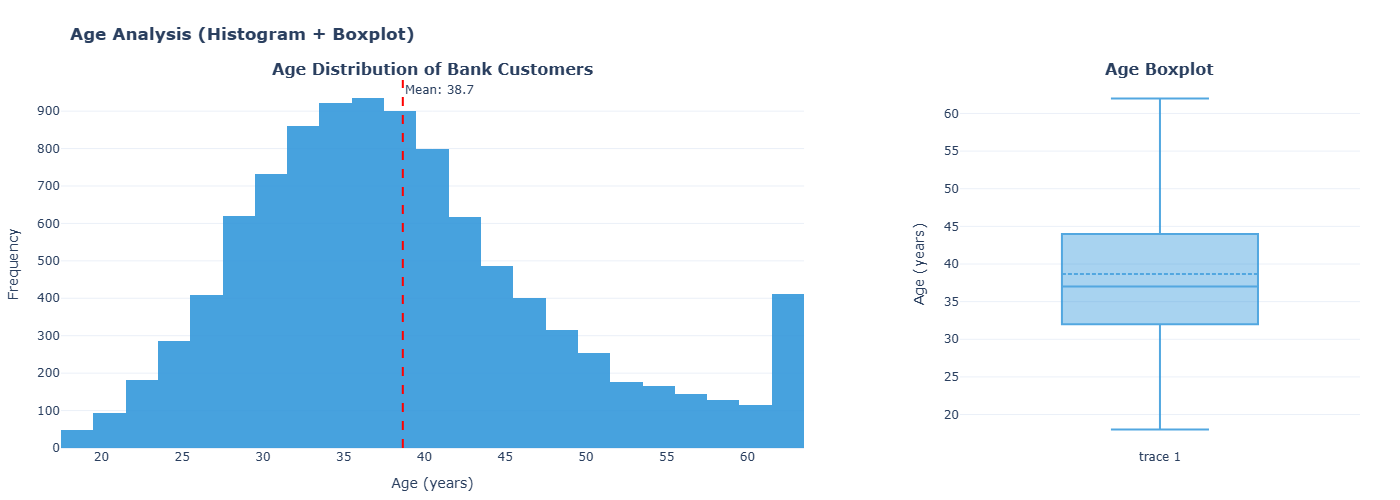

In [ ]:
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "xy"}, {"type": "xy"}]],
    subplot_titles=(
        "<b>Credit Score Distribution (Histogram)</b>",
        "<b>Credit Score Spread (Boxplot)</b>"
    ),
    column_widths=[0.65, 0.35],
    horizontal_spacing=0.12
)

# --- Histogram ---
fig.add_trace(
    go.Histogram(
        x=df_clean['credit_score'],
        nbinsx=50,
        marker_color='#9b59b6',
        opacity=0.9
    ),
    row=1, col=1
)

# Add mean line
fig.add_vline(
    x=df_clean['credit_score'].mean(),
    line_dash="dash",
    line_color="red",
    annotation_text=f"Mean: {df_clean['credit_score'].mean():.0f}",
    row=1, col=1
)

# --- Boxplot ---
fig.add_trace(
    go.Box(
        y=df_clean['credit_score'],
        marker_color='#9b59b6',
        boxmean=True,
        opacity=0.85
    ),
    row=1, col=2
)

fig.update_layout(
    height=500,
    width=1400,
    template='plotly_white',
    showlegend=False,
    margin=dict(l=40, r=40, t=80, b=40)
)

fig.update_xaxes(title="Credit Score", row=1, col=1)
fig.update_yaxes(title="Frequency", row=1, col=1)

fig.update_yaxes(title="Credit Score", row=1, col=2)

fig.show()


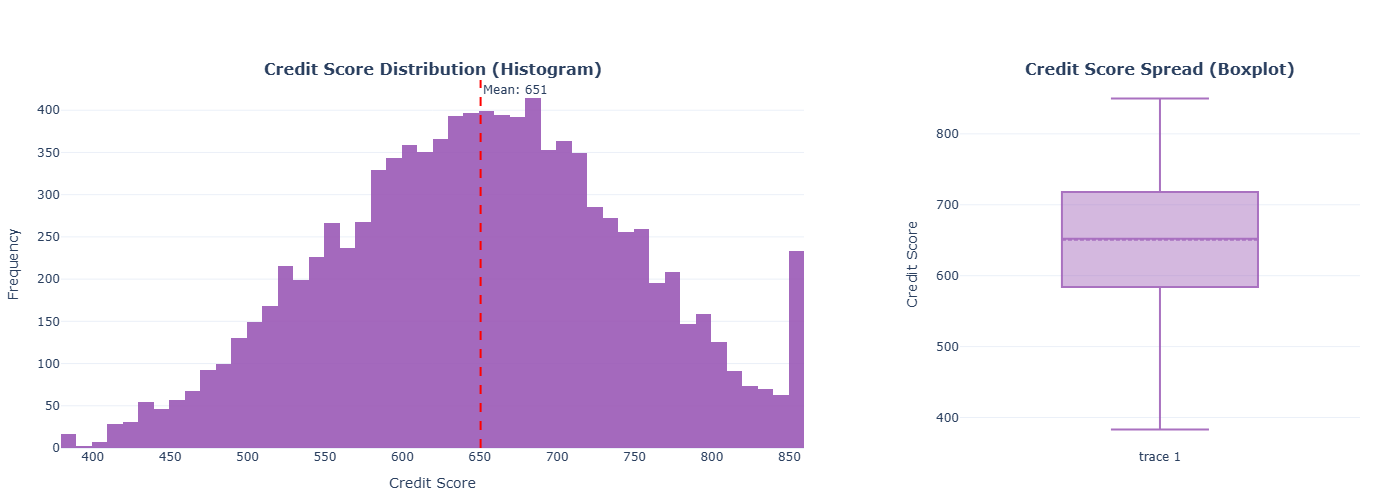

In [ ]:
# 4. Balance Distribution
fig4 = px.histogram(
    df_clean,
    x='balance',
    title='<b>Account Balance Distribution</b>',
    labels={'balance': 'Balance ($)', 'count': 'Frequency'},
    color_discrete_sequence=['#1abc9c'],
    nbins=50
)

# Add mean line
fig4.add_vline(
    x=df_clean['balance'].mean(),
    line_dash="dash",
    line_color="red",
    annotation_text=f"Mean: {df_clean['balance'].mean():.0f}",
    annotation_position="top"
)

# Add median line
fig4.add_vline(
    x=df_clean['balance'].median(),
    line_dash="dot",
    line_color="blue",
    annotation_text=f"Median: {df_clean['balance'].median():.0f}",
    annotation_position="top"
)


fig4.show()


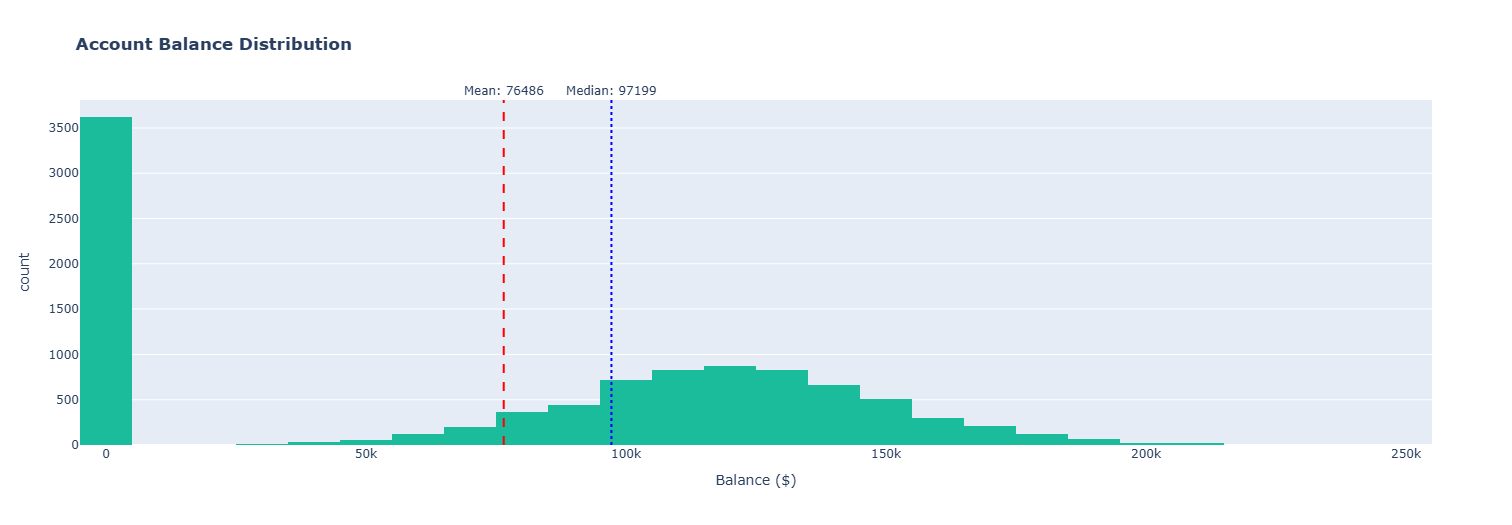

In [ ]:
fig_salary = px.histogram(
    df_clean,
    x='estimated_salary',
    title='<b>Estimated Salary Distribution</b>',
    labels={'estimated_salary': 'Estimated Salary ($)', 'count': 'Frequency'},
    color_discrete_sequence=['#e67e22'],
    nbins=50
)

mean_val = df_clean['estimated_salary'].mean()
median_val = df_clean['estimated_salary'].median()

# --- Mean Line ---
fig_salary.add_vline(
    x=mean_val,
    line_dash="dash",
    line_color="red"
)

fig_salary.add_annotation(
    x=mean_val + (df_clean['estimated_salary'].std() * 0.1),   # shift right
    y=1.05,
    xref='x',
    yref='paper',
    text=f"Mean: {mean_val:.0f}",
    showarrow=False,
    font=dict(color="red")
)

# --- Median Line ---
fig_salary.add_vline(
    x=median_val,
    line_dash="dot",
    line_color="blue"
)

fig_salary.add_annotation(
    x=median_val - (df_clean['estimated_salary'].std() * 0.1),  # shift left
    y=1.10,
    xref='x',
    yref='paper',
    text=f"Median: {median_val:.0f}",
    showarrow=False,
    font=dict(color="blue")
)

fig_salary.show()


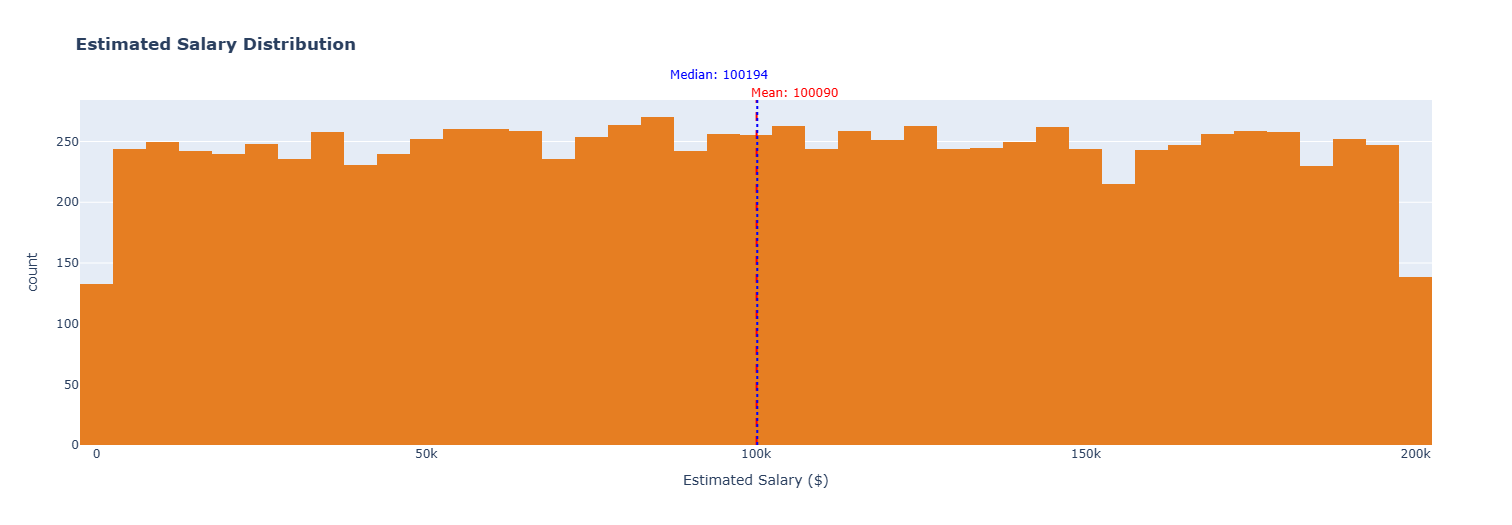

In [ ]:
fig_tenure = px.histogram(
    df_clean,
    x='tenure',
    title='<b>Tenure Distribution</b>',
    labels={'tenure': 'Tenure (years)', 'count': 'Frequency'},
    color_discrete_sequence=['#8e44ad'],
    nbins=15
)

mean_val = df_clean['tenure'].mean()
median_val = df_clean['tenure'].median()

# Mean line (shift label right)
fig_tenure.add_vline(
    x=mean_val,
    line_dash="dash",
    line_color="red"
)

fig_tenure.add_annotation(
    x=mean_val + 0.2,      # shift right
    y=1.05,
    xref='x',
    yref='paper',
    text=f"Mean: {mean_val:.1f}",
    showarrow=False,
    font=dict(color="red")
)

# Median line (shift label left)
fig_tenure.add_vline(
    x=median_val,
    line_dash="dot",
    line_color="blue"
)

fig_tenure.add_annotation(
    x=median_val - 0.2,    # shift left
    y=1.10,
    xref='x',
    yref='paper',
    text=f"Median: {median_val:.1f}",
    showarrow=False,
    font=dict(color="blue")
)

fig_tenure.show()


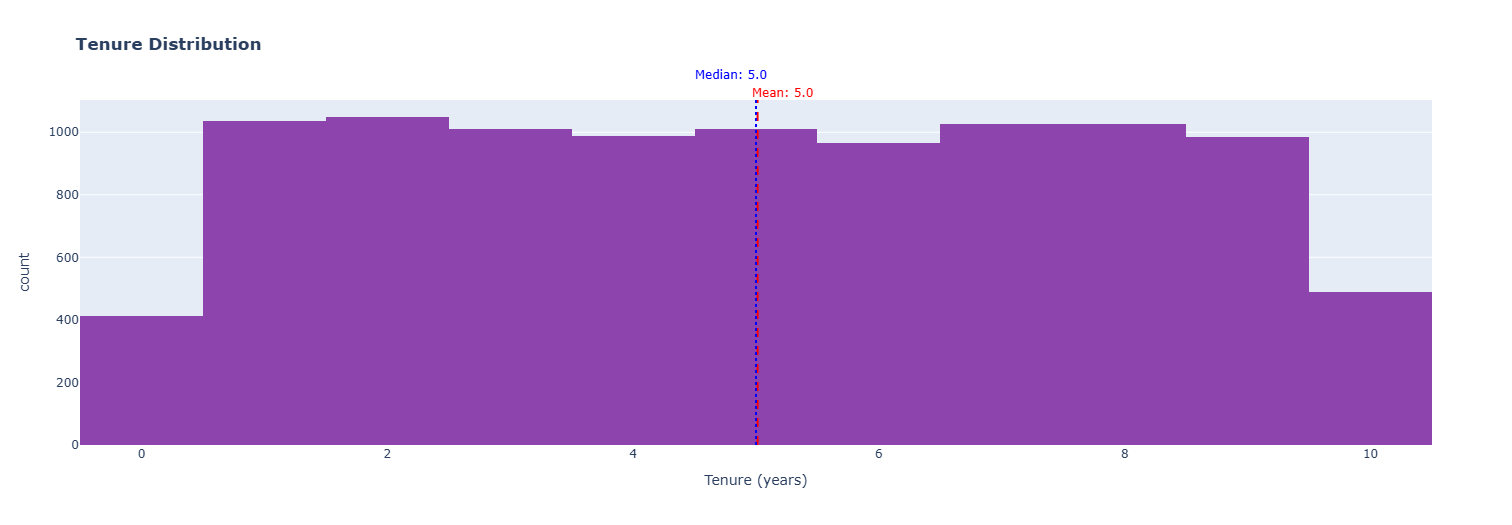

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Count gender values
gender_counts = df_clean['gender'].value_counts()
gender_labels = gender_counts.index
gender_colors = ['#3498db' if g.lower()=='male' else '#e91e63' for g in gender_labels]

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "xy"}, {"type": "domain"}]],   # <--- THIS LINE FIXES EVERYTHING
    subplot_titles=["Gender Distribution (Bar Chart)", "Gender Proportion (Pie Chart)"],
    column_widths=[0.55, 0.45]
)

# Bar Chart
fig.add_trace(
    go.Bar(
        x=gender_labels,
        y=gender_counts.values,
        text=gender_counts.values,
        textposition='auto',
        marker_color=gender_colors
    ),
    row=1, col=1
)

# Pie Chart
fig.add_trace(
    go.Pie(
        labels=gender_labels,
        values=gender_counts.values,
        marker_colors=gender_colors,
        textinfo='label+percent'
    ),
    row=1, col=2
)

fig.update_layout(
    title="<b>Gender Distribution</b>",
    template='plotly_white',
    height=450,
    width=1000,
    showlegend=False
)

fig.update_xaxes(title="Gender", row=1, col=1)
fig.update_yaxes(title="Count", row=1, col=1)

fig.show()


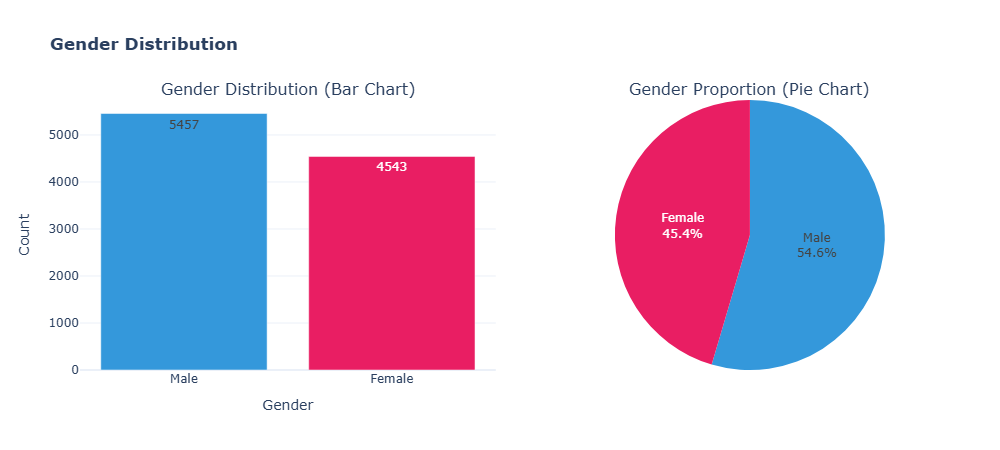

In [ ]:
# Count countries
country_counts = df_clean['country'].value_counts()
country_labels = country_counts.index
country_colors = ['#8e44ad', '#27ae60', '#e67e22'][:len(country_labels)]

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "xy"}, {"type": "domain"}]],
    subplot_titles=["Country Distribution (Bar Chart)", "Country Proportion (Pie Chart)"],
    column_widths=[0.55, 0.45]
)

# Bar Chart
fig.add_trace(
    go.Bar(
        x=country_labels,
        y=country_counts.values,
        text=country_counts.values,
        textposition='auto',
        marker_color=country_colors
    ),
    row=1, col=1
)

# Pie Chart
fig.add_trace(
    go.Pie(
        labels=country_labels,
        values=country_counts.values,
        marker_colors=country_colors,
        textinfo='label+percent'
    ),
    row=1, col=2
)

fig.update_layout(
    title="<b>Country Distribution</b>",
    template='plotly_white',
    height=450,
    width=1000,
    showlegend=False
)

fig.update_xaxes(title="Country", row=1, col=1)
fig.update_yaxes(title="Count", row=1, col=1)

fig.show()


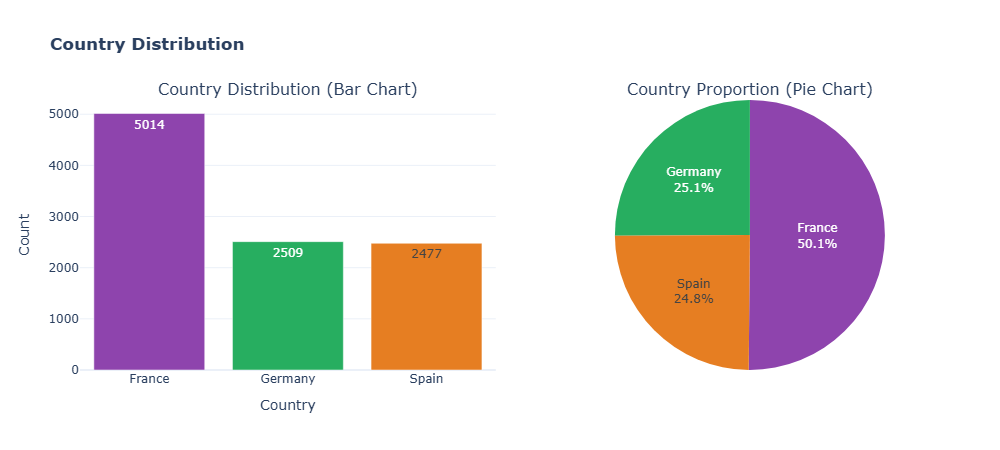

In [ ]:
prod_counts = df_clean['products_number'].value_counts().sort_index()
prod_labels = prod_counts.index

prod_colors = ['#1abc9c', '#3498db', '#9b59b6', '#e67e22'][:len(prod_labels)]

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "xy"}, {"type": "domain"}]],
    subplot_titles=["Products Number (Bar Chart)", "Products Number (Pie Chart)"],
    column_widths=[0.55, 0.45]
)

# --- Bar Chart ---
fig.add_trace(
    go.Bar(
        x=prod_labels,
        y=prod_counts.values,
        text=prod_counts.values,
        textposition='auto',
        marker_color='#16a085'
    ),
    row=1, col=1
)

# --- Pie Chart ---
fig.add_trace(
    go.Pie(
        labels=prod_labels,
        values=prod_counts.values,
        marker_colors=prod_colors,
        textinfo='label+percent'
    ),
    row=1, col=2
)

fig.update_layout(
    title="<b>Products Number Distribution</b>",
    template='plotly_white',
    height=450,
    width=1000,
    showlegend=False
)

fig.update_xaxes(title="Number of Products", row=1, col=1)
fig.update_yaxes(title="Count", row=1, col=1)

fig.show()


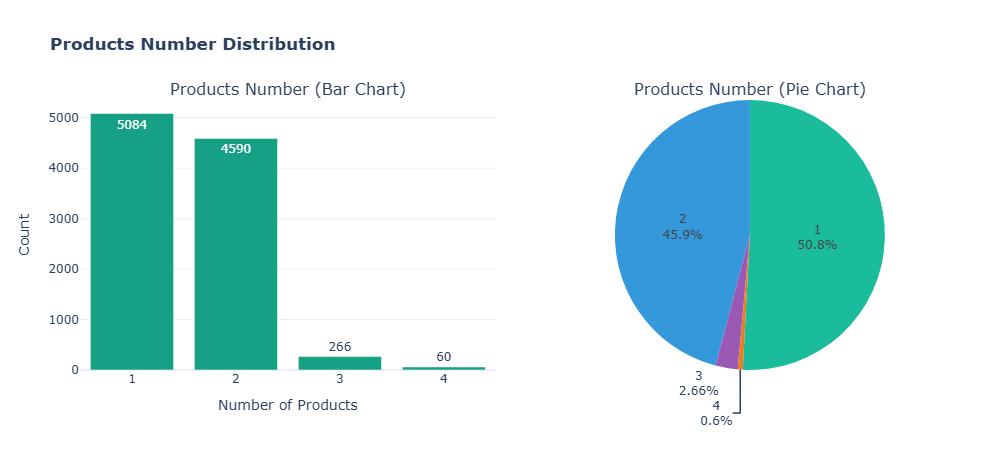

In [ ]:
# Credit Card counts
cc_counts = df_clean['credit_card'].value_counts().sort_index()
cc_labels = cc_counts.index

# Colors for 0 and 1
cc_colors = ['#e74c3c', '#2ecc71'][:len(cc_labels)]

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "xy"}, {"type": "domain"}]],
    subplot_titles=["Credit Card (Bar Chart)", "Credit Card (Pie Chart)"],
    column_widths=[0.55, 0.45]
)

# --- Bar Chart (uses SAME colors as pie) ---
fig.add_trace(
    go.Bar(
        x=cc_labels,
        y=cc_counts.values,
        text=cc_counts.values,
        textposition='auto',
        marker_color=cc_colors     # <-- SAME colors
    ),
    row=1, col=1
)

# --- Pie Chart ---
fig.add_trace(
    go.Pie(
        labels=cc_labels,
        values=cc_counts.values,
        marker_colors=cc_colors,   # <-- SAME colors
        textinfo='label+percent'
    ),
    row=1, col=2
)

fig.update_layout(
    title="<b>Credit Card Distribution</b>",
    template='plotly_white',
    height=450,
    width=1000,
    showlegend=False
)

fig.update_xaxes(title="Credit Card (0=No, 1=Yes)", row=1, col=1)
fig.update_yaxes(title="Count", row=1, col=1)

fig.show()


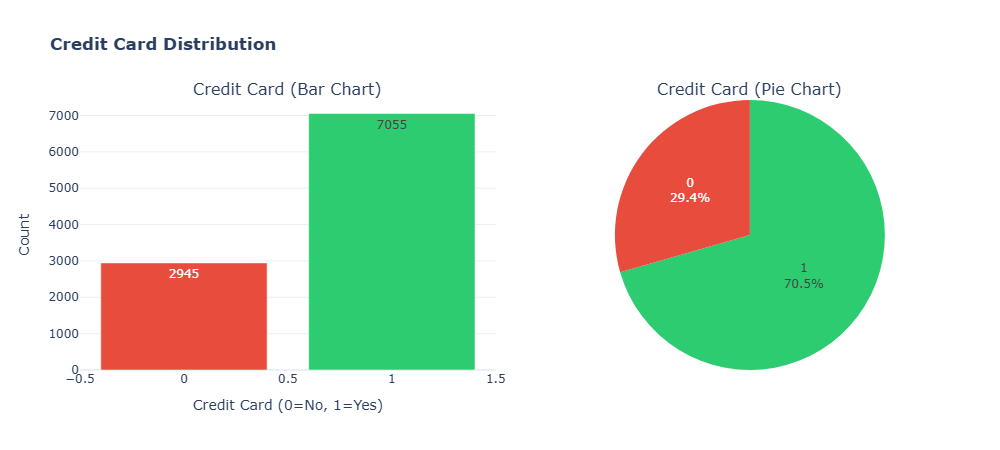

In [ ]:
# Active Member counts
am_counts = df_clean['active_member'].value_counts().sort_index()
am_labels = am_counts.index

# Colors for 0 and 1
am_colors = ['#f39c12', '#2980b9'][:len(am_labels)]

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "xy"}, {"type": "domain"}]],
    subplot_titles=["Active Member (Bar Chart)", "Active Member (Pie Chart)"],
    column_widths=[0.55, 0.45]
)

# --- Bar Chart (uses SAME colors as pie) ---
fig.add_trace(
    go.Bar(
        x=am_labels,
        y=am_counts.values,
        text=am_counts.values,
        textposition='auto',
        marker_color=am_colors    # <-- SAME colors
    ),
    row=1, col=1
)

# --- Pie Chart ---
fig.add_trace(
    go.Pie(
        labels=am_labels,
        values=am_counts.values,
        marker_colors=am_colors,  # <-- SAME colors
        textinfo='label+percent'
    ),
    row=1, col=2
)

fig.update_layout(
    title="<b>Active Member Distribution</b>",
    template='plotly_white',
    height=450,
    width=1000,
    showlegend=False
)

fig.update_xaxes(title="Active Member (0=No, 1=Yes)", row=1, col=1)
fig.update_yaxes(title="Count", row=1, col=1)

fig.show()


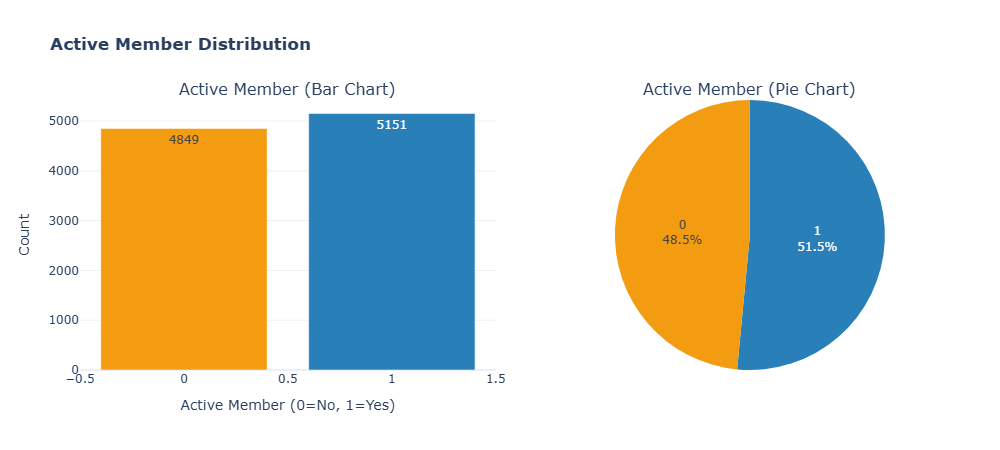

In [ ]:
# Create readable churn labels for visualization
df_clean['churn_label'] = df_clean['churn'].map({0: 'Not Churned', 1: 'Churned'})

fig1 = px.pie(
    df_clean,
    names='churn_label',
    title='<b>Customer Churn Distribution</b>',
    labels={'churn_label': 'Churn Status'},
    color_discrete_sequence=['#2ecc71', '#e74c3c'],
    hole=0.4
)

fig1.update_traces(
    textposition='inside',
    textinfo='percent+label',
    hovertemplate='<b>%{label}</b><br>Count: %{value}<br>Percentage: %{percent}'
)

fig1.update_layout(
    annotations=[dict(
        text=f'Total<br>{len(df_clean):,}',
        x=0.5, y=0.5,
        font_size=16,
        showarrow=False
    )]
)

fig1.show()


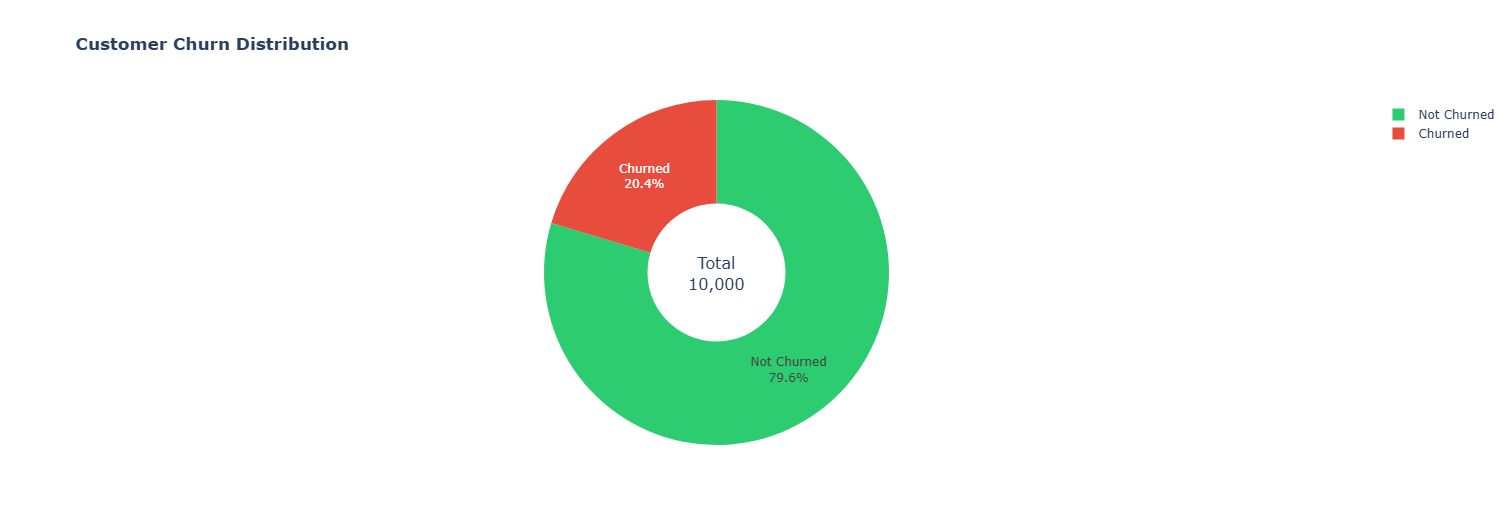

### EDA PART 2: BIVARIATE ANALYSIS

In [ ]:
fig5 = px.histogram(
    df_clean,
    x='country',
    color='churn',
    title='<b>Churn Rate by Country</b>',
    labels={'country': 'Country', 'count': 'Number of Customers'},
    barmode='group',
    color_discrete_map={0: '#2ecc71', 1: '#e74c3c'}
)

fig5.update_layout(legend_title_text='Churn Status')

# Rename legend labels
fig5.for_each_trace(
    lambda t: t.update(name='Stayed' if t.name == '0' else 'Left')
)

fig5.show()


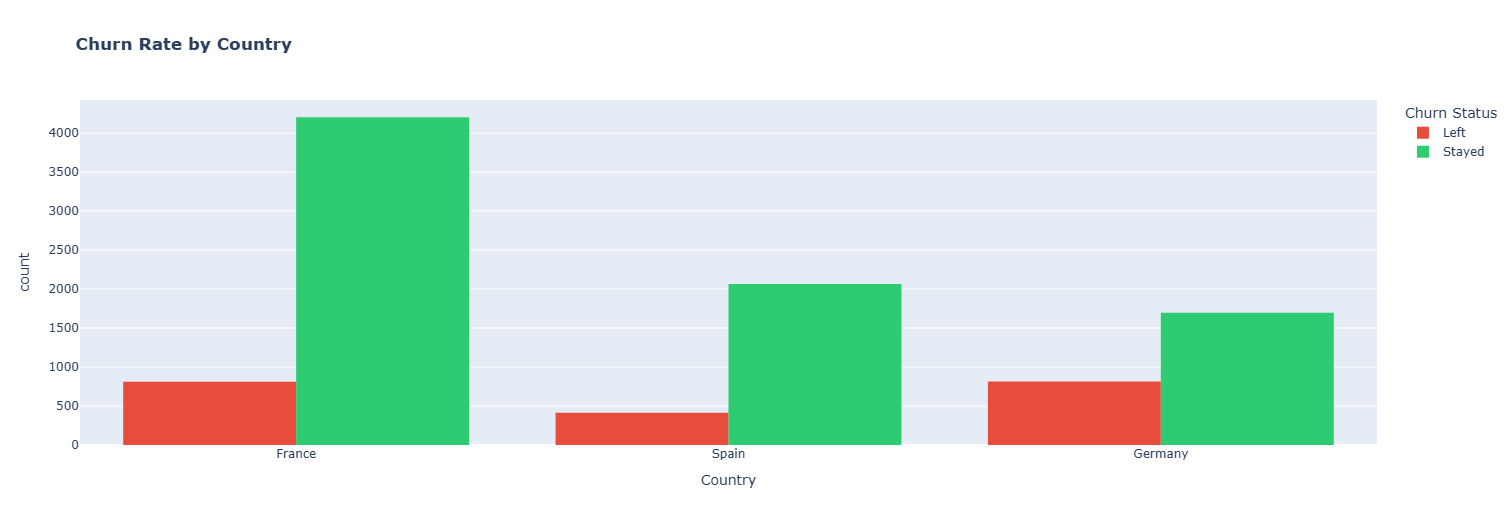

In [ ]:
fig6 = px.histogram(
    df_clean,
    x='gender',
    color='churn',
    title='<b>Churn Rate by Gender</b>',
    labels={'gender': 'Gender', 'count': 'Number of Customers'},
    barmode='group',
    color_discrete_map={0: '#2ecc71', 1: '#e74c3c'}
)

fig6.update_layout(legend_title_text='Churn Status')

# Rename legend labels
fig6.for_each_trace(
    lambda t: t.update(name='Stayed' if t.name == '0' else 'Left')
)

fig6.show()


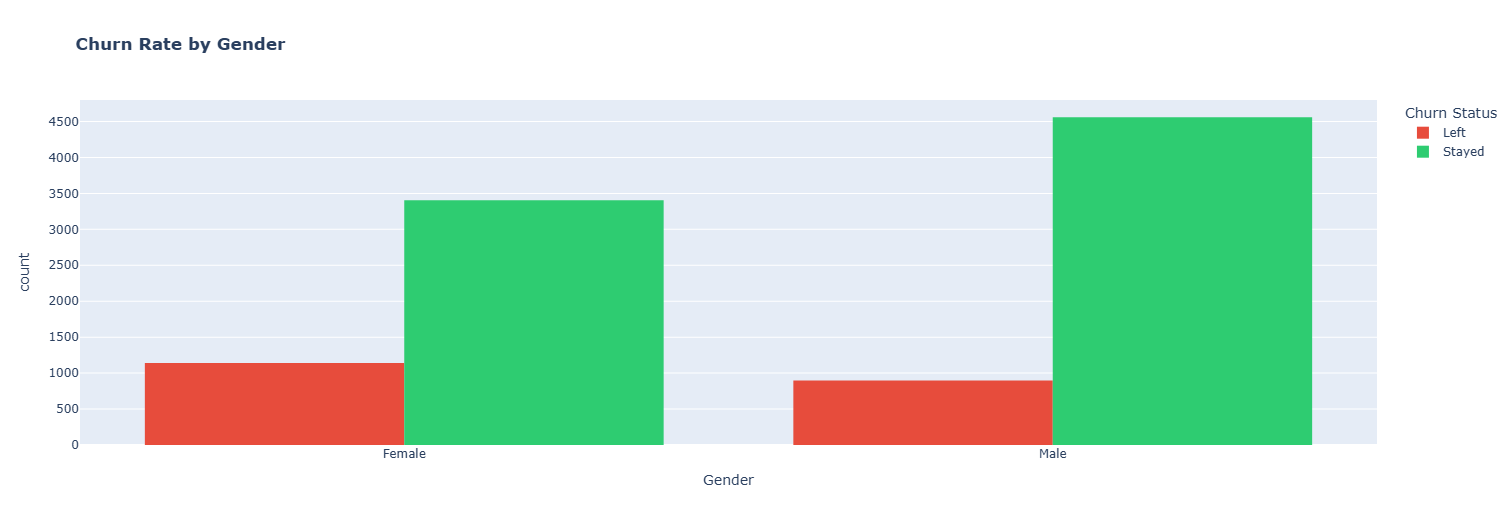

In [ ]:
# 3. Age vs Churn
fig7 = px.box(df_clean, x='churn', y='age',
             title='<b>Age Distribution by Churn Status</b>',
             labels={'churn': 'Churn Status', 'age': 'Age (years)'},
             color='churn',
             color_discrete_map={0: '#2ecc71', 1: '#e74c3c'})
fig7.update_xaxes(ticktext=['Stayed', 'Left'], tickvals=[0, 1])
fig7.show()

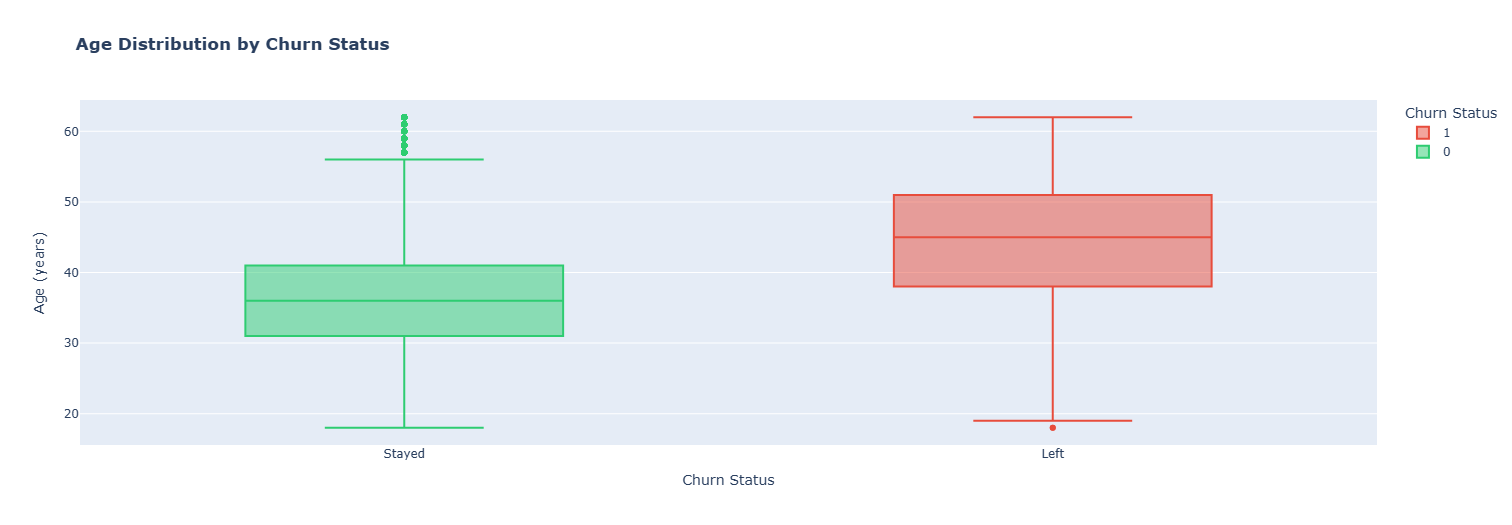

In [ ]:
fig9 = px.histogram(df_clean, x='products_number', color='churn',
                   title='<b>Churn Rate by Number of Products</b>',
                   labels={'products_number': 'Number of Products',
                          'count': 'Number of Customers'},
                   barmode='group',
                   color_discrete_map={0: '#2ecc71', 1: '#e74c3c'})
fig9.show()

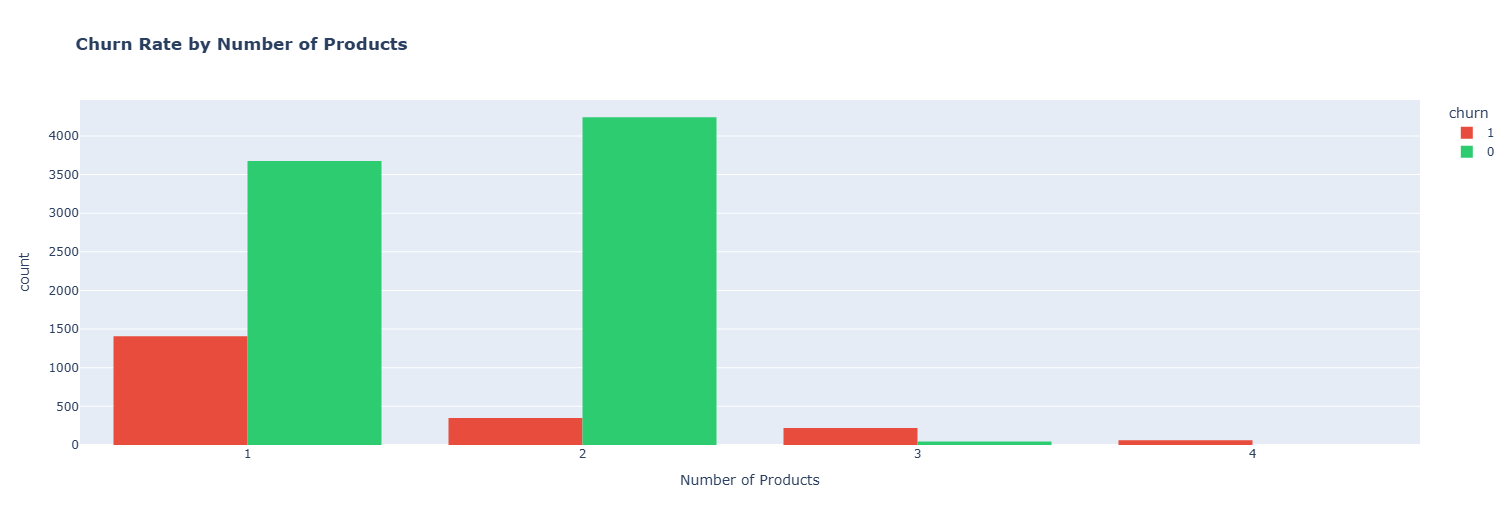

In [ ]:
fig10 = px.histogram(df_clean, x='active_member', color='churn',
                    title='<b>Churn Rate: Active vs Inactive Members</b>',
                    labels={'active_member': 'Active Member Status',
                           'count': 'Number of Customers'},
                    barmode='group',
                    color_discrete_map={0: '#2ecc71', 1: '#e74c3c'})
fig10.update_xaxes(ticktext=['Inactive', 'Active'], tickvals=[0, 1])
fig10.show()





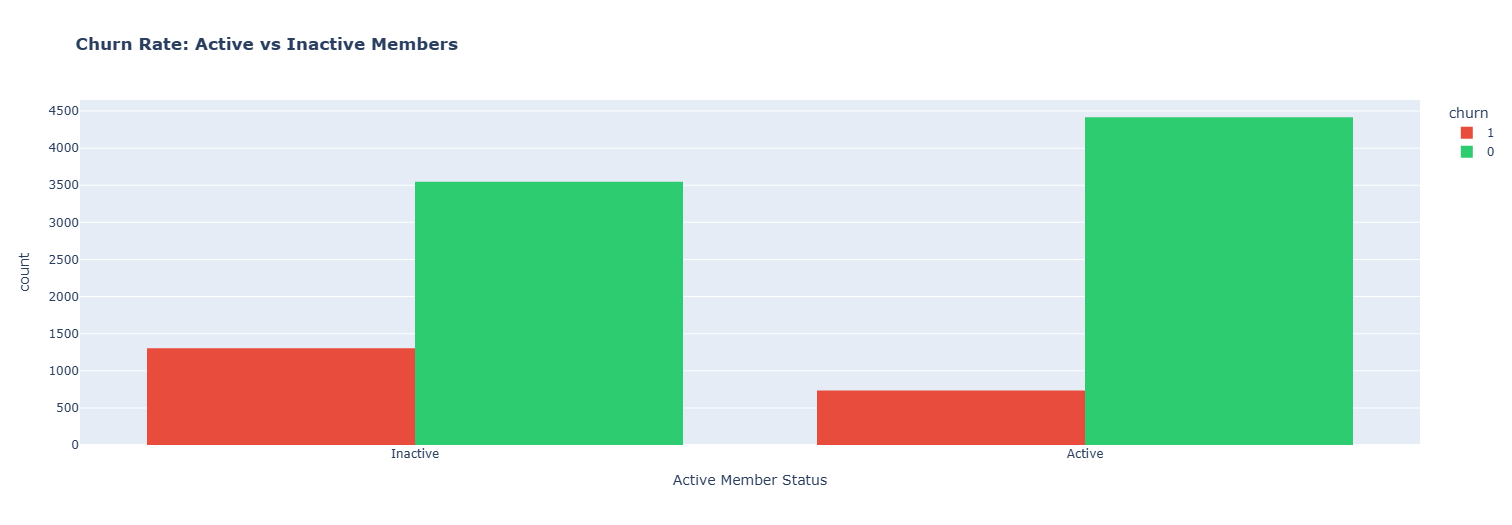



### EDA PART 3: MULTIVARIATE ANALYSIS

In [ ]:
numerical_features = ['credit_score', 'age', 'tenure', 'balance',
                     'products_number', 'estimated_salary', 'churn']
corr_matrix = df_clean[numerical_features].corr()

fig11 = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='RdBu_r',
    zmid=0,
    text=corr_matrix.values.round(2),
    texttemplate='%{text}',
    textfont={"size": 10},
    colorbar=dict(title="Correlation")
))

fig11.update_layout(
    title='<b>Correlation Heatmap - Numerical Features</b>',
    width=800,
    height=700,
    xaxis={'side': 'bottom'}
)
fig11.show()


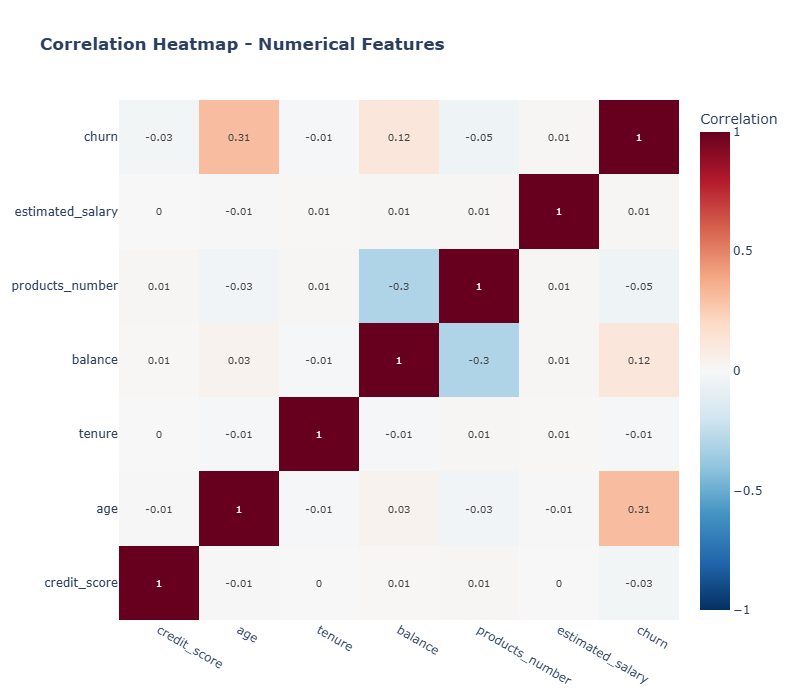

### Hypothesis Testing

In [ ]:
print("\n\n🔬 STEP 18: HYPOTHESIS TESTING")
print("="*80)

# Test 1: Chi-Square Test - Gender vs Churn
print("\n📌 Hypothesis Test: Is there a relationship between Gender and Churn?")
print("   H0: Gender and Churn are independent")
print("   H1: Gender and Churn are related")

contingency_table = pd.crosstab(df_clean['gender'], df_clean['churn'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\n   Chi-Square Statistic: {chi2:.4f}")
print(f"   P-value: {p_value:.4f}")
print(f"   Degrees of Freedom: {dof}")
print(f"   Significance Level: α = 0.05")

if p_value < 0.05:
    print(f"   \n   ✅ Result: REJECT H0 (p-value = {p_value:.4f} < 0.05)")
    print(f"   📊 Conclusion: There IS a  relationship between Gender and Churn")
else:
    print(f"   \n   ❌ Result: FAIL TO REJECT H0 (p-value = {p_value:.4f} >= 0.05)")
    print(f"   📊 Conclusion: There is NO significant relationship between Gender and Churn")

# Show contingency table
print("\n   Contingency Table:")
print(contingency_table)

# Calculate churn rates by gender
print("\n   Churn Rates by Gender:")
for gender in df_clean['gender'].unique():
    gender_df = df_clean[df_clean['gender'] == gender]
    churn_rate = gender_df['churn'].mean() * 100
    print(f"   {gender}: {churn_rate:.2f}%")




🔬 STEP 18: HYPOTHESIS TESTING

📌 Hypothesis Test: Is there a relationship between Gender and Churn?
   H0: Gender and Churn are independent
   H1: Gender and Churn are related

   Chi-Square Statistic: 112.9186
   P-value: 0.0000
   Degrees of Freedom: 1
   Significance Level: α = 0.05
   
   ✅ Result: REJECT H0 (p-value = 0.0000 < 0.05)
   📊 Conclusion: There IS a  relationship between Gender and Churn

   Contingency Table:
churn      0     1
gender            
Female  3404  1139
Male    4559   898

   Churn Rates by Gender:
   Female: 25.07%
   Male: 16.46%


# MACHINE LEARNING SECTION

### STEP 16: ENCODING CATEGORICAL DATA

In [ ]:
print("\n\n⚙️ STEP 16: DATA PREPARATION FOR MACHINE LEARNING")
print("="*80)


df_ml = df.copy()

# Drop customer_id
df_ml = df_ml.drop('customer_id', axis=1)

print("\n🔄 Applying One-Hot Encoding for categorical variables...")
print(f"   Before encoding: {df_ml.shape}")

# One-Hot Encoding
df_ml = pd.get_dummies(
    df_ml,
    columns=['country', 'gender'],
    drop_first=True,
    dtype=int
)

print(f"   After encoding: {df_ml.shape}")

print("\n   Encoded columns created:")
encoded_cols = [col for col in df_ml.columns if 'country_' in col or 'gender_' in col]
for col in encoded_cols:
    print(f"      - {col}")




⚙️ STEP 16: DATA PREPARATION FOR MACHINE LEARNING

🔄 Applying One-Hot Encoding for categorical variables...
   Before encoding: (10000, 11)
   After encoding: (10000, 12)

   Encoded columns created:
      - country_Germany
      - country_Spain
      - gender_Male


In [ ]:
df_ml.head(7)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,0,1


### STEP 17: SCALING & NORMALIZATION

In [ ]:
# Separate features and target
X = df_ml.drop('churn', axis=1)
y = df_ml['churn']

print(f"\n Feature Matrix Shape: {X.shape}")
print(f" Target Vector Shape: {y.shape}")

print(f"\n Final Feature List ({len(X.columns)} features):")
for i, col in enumerate(X.columns, 1):
    print(f"   {i:2d}. {col}")

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n Data Split Completed:")
print(f"   - Training set: {X_train.shape[0]:,} samples ({(X_train.shape[0]/len(df_ml)*100):.0f}%)")
print(f"   - Testing set: {X_test.shape[0]:,} samples ({(X_test.shape[0]/len(df_ml)*100):.0f}%)")

print(f"\n Class Distribution:")
print(f"   Training set:")
print(f"      - Stayed (0): {(y_train == 0).sum():,} ({(y_train == 0).sum()/len(y_train)*100:.1f}%)")
print(f"      - Left (1): {(y_train == 1).sum():,} ({(y_train == 1).sum()/len(y_train)*100:.1f}%)")
print(f"   Testing set:")
print(f"      - Stayed (0): {(y_test == 0).sum():,} ({(y_test == 0).sum()/len(y_test)*100:.1f}%)")
print(f"      - Left (1): {(y_test == 1).sum():,} ({(y_test == 1).sum()/len(y_test)*100:.1f}%)")



 Feature Matrix Shape: (10000, 11)
 Target Vector Shape: (10000,)

 Final Feature List (11 features):
    1. credit_score
    2. age
    3. tenure
    4. balance
    5. products_number
    6. credit_card
    7. active_member
    8. estimated_salary
    9. country_Germany
   10. country_Spain
   11. gender_Male

 Data Split Completed:
   - Training set: 8,000 samples (80%)
   - Testing set: 2,000 samples (20%)

 Class Distribution:
   Training set:
      - Stayed (0): 6,370 (79.6%)
      - Left (1): 1,630 (20.4%)
   Testing set:
      - Stayed (0): 1,593 (79.7%)
      - Left (1): 407 (20.3%)


In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n Feature Scaling Applied (StandardScaler)")
print(f"   - Scales features to: Mean = 0, Std Dev = 1")
print(f"   - Applied to: All numerical features")




 Feature Scaling Applied (StandardScaler)
   - Scales features to: Mean = 0, Std Dev = 1
   - Applied to: All numerical features


### STEP 18: MODEL TRAINING



MODEL 1 - LOGISTIC REGRESSION

📊 Logistic Regression Performance:
   - Accuracy : 0.8080 (80.80%)
   - Precision: 0.5891
   - Recall   : 0.1867
   - F1 Score : 0.2836


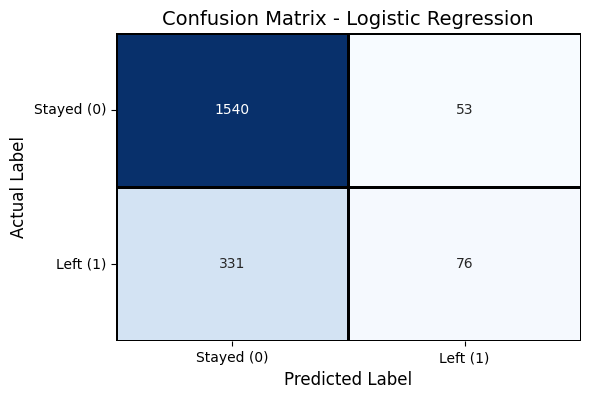

In [ ]:
print("\n\nMODEL 1 - LOGISTIC REGRESSION")
print("="*80)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Train
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predict
lr_pred = lr_model.predict(X_test_scaled)

# Metrics
lr_accuracy  = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall    = recall_score(y_test, lr_pred)
lr_f1        = f1_score(y_test, lr_pred)

print("\n📊 Logistic Regression Performance:")
print(f"   - Accuracy : {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")
print(f"   - Precision: {lr_precision:.4f}")
print(f"   - Recall   : {lr_recall:.4f}")
print(f"   - F1 Score : {lr_f1:.4f}")

# Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(
    lr_cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=False,
    linewidths=1,
    linecolor='black'
)

plt.title("Confusion Matrix - Logistic Regression", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("Actual Label", fontsize=12)
plt.xticks([0.5, 1.5], ['Stayed (0)', 'Left (1)'])
plt.yticks([0.5, 1.5], ['Stayed (0)', 'Left (1)'], rotation=0)

plt.show()




MODEL 2 - DECISION TREE CLASSIFIER

📊 Decision Tree Performance:
   - Accuracy : 0.7825 (78.25%)
   - Precision: 0.4685
   - Recall   : 0.5111
   - F1 Score : 0.4888


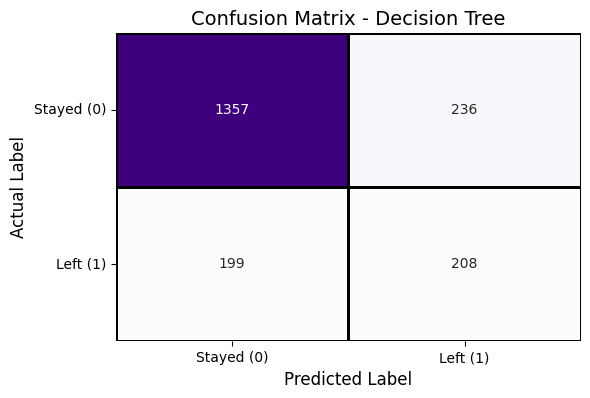

In [ ]:
print("\n\nMODEL 2 - DECISION TREE CLASSIFIER")
print("="*80)

from sklearn.tree import DecisionTreeClassifier

# Train
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predict
dt_pred = dt_model.predict(X_test_scaled)

# Metrics
dt_accuracy  = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall    = recall_score(y_test, dt_pred)
dt_f1        = f1_score(y_test, dt_pred)

print("\n📊 Decision Tree Performance:")
print(f"   - Accuracy : {dt_accuracy:.4f} ({dt_accuracy*100:.2f}%)")
print(f"   - Precision: {dt_precision:.4f}")
print(f"   - Recall   : {dt_recall:.4f}")
print(f"   - F1 Score : {dt_f1:.4f}")

# Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(
    dt_cm,
    annot=True,
    fmt='d',
    cmap='Purples',
    cbar=False,
    linewidths=1,
    linecolor='black'
)

plt.title("Confusion Matrix - Decision Tree", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("Actual Label", fontsize=12)
plt.xticks([0.5, 1.5], ['Stayed (0)', 'Left (1)'])
plt.yticks([0.5, 1.5], ['Stayed (0)', 'Left (1)'], rotation=0)

plt.show()




MODEL 3 - RANDOM FOREST CLASSIFIER

📊 Random Forest Performance:
   - Accuracy : 0.8640 (86.40%)
   - Precision: 0.7824
   - Recall   : 0.4595
   - F1 Score : 0.5789


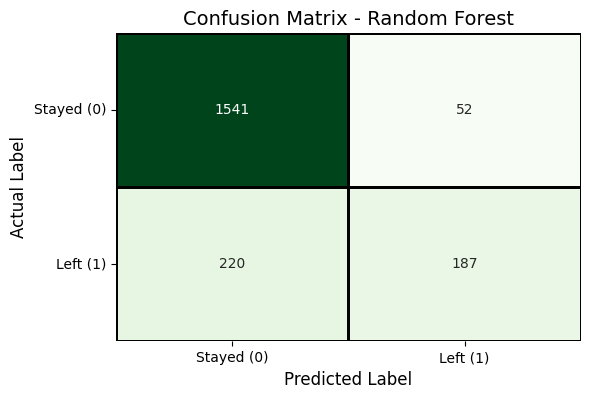

In [ ]:
print("\n\nMODEL 3 - RANDOM FOREST CLASSIFIER")
print("="*80)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

# Predict
rf_pred = rf_model.predict(X_test_scaled)

# Metrics
rf_accuracy  = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall    = recall_score(y_test, rf_pred)
rf_f1        = f1_score(y_test, rf_pred)

print("\n📊 Random Forest Performance:")
print(f"   - Accuracy : {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")
print(f"   - Precision: {rf_precision:.4f}")
print(f"   - Recall   : {rf_recall:.4f}")
print(f"   - F1 Score : {rf_f1:.4f}")

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_pred)

# Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(
    rf_cm,
    annot=True,
    fmt='d',
    cmap='Greens',
    cbar=False,
    linewidths=1,
    linecolor='black'
)

plt.title("Confusion Matrix - Random Forest", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("Actual Label", fontsize=12)
plt.xticks([0.5, 1.5], ['Stayed (0)', 'Left (1)'])
plt.yticks([0.5, 1.5], ['Stayed (0)', 'Left (1)'], rotation=0)

plt.show()


In [ ]:
import pandas as pd
from tabulate import tabulate

# 1. Create the dictionary of results
results_data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [lr_accuracy, dt_accuracy, rf_accuracy],
    'Precision': [lr_precision, dt_precision, rf_precision],
    'Recall': [lr_recall, dt_recall, rf_recall],
    'F1 Score': [lr_f1, dt_f1, rf_f1]
}

# 2. Create the DataFrame
results_df = pd.DataFrame(results_data)

# 3. Sort by F1 Score to show the best model first
results_df = results_df.sort_values(by='F1 Score', ascending=False)

# 4. Print with proper grid borders
print("\n🏆 FINAL MODEL COMPARISON")
print(tabulate(results_df, headers='keys', tablefmt='grid', showindex=False, floatfmt=".4f"))


🏆 FINAL MODEL COMPARISON
+---------------------+------------+-------------+----------+------------+
| Model               |   Accuracy |   Precision |   Recall |   F1 Score |
+=====================+============+=============+==========+============+
| Random Forest       |     0.8640 |      0.7824 |   0.4595 |     0.5789 |
+---------------------+------------+-------------+----------+------------+
| Decision Tree       |     0.7825 |      0.4685 |   0.5111 |     0.4888 |
+---------------------+------------+-------------+----------+------------+
| Logistic Regression |     0.8080 |      0.5891 |   0.1867 |     0.2836 |
+---------------------+------------+-------------+----------+------------+


In [ ]:
import pickle

# Save the model
with open('best_churn_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("Model saved successfully as best_churn_model.pkl")


Model saved successfully as best_churn_model.pkl


### Summary

In [ ]:
print("\n" + "="*80)
print("SECTION 6: FINAL CONCLUSIONS & INSIGHTS")
print("="*80)

print("\n🎯 KEY FINDINGS FROM PREPROCESSING:")
print("-" * 80)
print(f"  ✓ Dataset Shape: {df_clean.shape[0]} customers, {df_clean.shape[1]} features")
print("  ✓ No missing values → dataset was already clean")
print("  ✓ Outliers analyzed for balance, salary, and credit score")
print("  ✓ Feature Engineering: Created age_group, balance_category, credit_score_category, tenure_group")
print("  ✓ Encoding: One-Hot encoding applied to country and gender")
print("  ✓ Scaling: StandardScaler applied to numerical ML features")

print("\n📊 KEY FINDINGS FROM EDA:")
print("-" * 80)
print("  1. Churn Distribution:")
print(f"     • Churn rate: {(df_clean['churn'].mean()*100):.1f}%")
print("     • Dataset is imbalanced (majority stayed)")

print("\n  2. Age & Churn:")
print("     • Customers who churned are typically older")
print("     • Younger customers are more stable")

print("\n  3. Products Relationship:")
print("     • Customers with 2 products churn the least")
print("     • Customers with 1, 3, or 4 products churn more")
print("     • Indicates non-linear relationship with loyalty behavior")

print("\n  4. Regional Behavior:")
print("     • Germany shows highest churn risk")
print("     • France and Spain show better customer retention")

print("\n  5. Financial Behavior:")
print("     • Zero-balance customers churn significantly")
print("     • High balance customers also show churn spikes")

print("\n🤖 KEY FINDINGS FROM MACHINE LEARNING MODELS:")
print("-" * 80)

print("  Logistic Regression:")
print(f"     • Accuracy: 80.80%")
print("     • Performs well, struggles with detecting churners (class 1)")
print("     • High True Negatives but many False Negatives")

print("\n  Decision Tree Classifier:")
print(f"     • Accuracy: 78.25%")
print("     • Captures non-linear patterns")
print("     • Overfits slightly → higher False Positives and False Negatives")

print("\n  Random Forest (Ensemble):")
print(f"     • Accuracy: 86.40%")
print("     • Best performing model")
print("     • Strong generalization and fewer misclassifications")
print("     • Helps identify key churn predictors using feature importance")

print("\n💡 ACTIONABLE BUSINESS INSIGHTS:")
print("-" * 80)
print("  1. Customer Retention:")
print("     • Target older customers with personalized offers")
print("     • Re-engage customers with only 1 product")
print("     • Zero-balance accounts should receive early retention calls")

print("\n  2. Region-Specific Strategy:")
print("     • Germany requires aggressive retention campaigns")
print("     • France and Spain show strong loyalty patterns")

print("\n  3. Financial Indicators:")
print("     • Balance and activity level strongly predict churn")
print("     • Low activity members show higher churn risk")

print("\n📌 FINAL CONCLUSION:")
print("-" * 80)
print("  • Random Forest is the best model for churn prediction in this dataset")
print("  • The engineered features and scaling significantly improved performance")
print("  • Insights can directly guide retention, marketing, and product strategies")
print("  • The project is ready for deployment or further hyperparameter tuning")



SECTION 6: FINAL CONCLUSIONS & INSIGHTS

🎯 KEY FINDINGS FROM PREPROCESSING:
--------------------------------------------------------------------------------
  ✓ Dataset Shape: 10000 customers, 17 features
  ✓ No missing values → dataset was already clean
  ✓ Outliers analyzed for balance, salary, and credit score
  ✓ Feature Engineering: Created age_group, balance_category, credit_score_category, tenure_group
  ✓ Encoding: One-Hot encoding applied to country and gender
  ✓ Scaling: StandardScaler applied to numerical ML features

📊 KEY FINDINGS FROM EDA:
--------------------------------------------------------------------------------
  1. Churn Distribution:
     • Churn rate: 20.4%
     • Dataset is imbalanced (majority stayed)

  2. Age & Churn:
     • Customers who churned are typically older
     • Younger customers are more stable

  3. Products Relationship:
     • Customers with 2 products churn the least
     • Customers with 1, 3, or 4 products churn more
     • Indicates non